<a href="https://colab.research.google.com/github/rts1988/Duolingo_spaced_repetition/blob/main/Duolingo_spaced_repetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spaced repetition data ~13mill records of students answering language learning questions. time traces. 
https://paperswithcode.com/dataset/duolingo-spaced-repetition-data

Data dictionary: 

-   `p_recall` - proportion of exercises from this lesson/practice where the word/lexeme was correctly recalled
-   `timestamp` - UNIX timestamp of the current lesson/practice
-   `delta` - time (in seconds) since the last lesson/practice that included this word/lexeme
-   `user_id` - student user ID who did the lesson/practice (anonymized)
-   `learning_language` - language being learned
-   `ui_language` - user interface language (presumably native to the student)
-   `lexeme_id` - system ID for the lexeme tag (i.e., word)
-   `lexeme_string` - lexeme tag (see below)
-   `history_seen` - total times user has seen the word/lexeme prior to this lesson/practice
-   `history_correct` - total times user has been correct for the word/lexeme prior to this lesson/practice
-   `session_seen` - times the user saw the word/lexeme during this lesson/practice
-   `session_correct` - times the user got the word/lexeme correct during this lesson/practice

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileid = "1MdLRV3GQ76-xqSGkH1QUDQ1MHrg_JtU_"
filename = "settles.acl16.learning_traces.13m.csv.gz"


downloaded = drive.CreateFile({'id':fileid}) 
downloaded.GetContentFile(filename)

In [ ]:
# from https://www.tutorialspoint.com/python-support-for-gzip-files-gzip
import gzip
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
datacsv = []
with gzip.open("settles.acl16.learning_traces.13m.csv.gz", 'rb') as f_in:
  with open("settles.acl16.learning_traces.13m.csv", 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)

In [ ]:
datadf = pd.read_csv("settles.acl16.learning_traces.13m.csv")

In [ ]:
datadf.head(4)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1


In [ ]:
datadf['delta'].describe()

count    1.285423e+07
mean     7.295811e+05
std      2.246499e+06
min      1.000000e+00
25%      5.320000e+02
50%      7.713400e+04
75%      4.425070e+05
max      4.032836e+07
Name: delta, dtype: float64

In [ ]:
datadf['p_forgot'] = 1- datadf['p_recall']

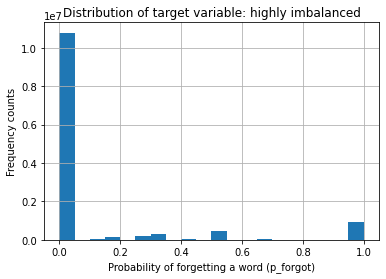

In [ ]:
plt.figure()
plt.xlabel("Probability of forgetting a word (p_forgot)")
plt.ylabel("Frequency counts")
plt.title("Distribution of target variable: highly imbalanced")
datadf['p_forgot'].hist(bins=20)

In [ ]:
datadf['p_forgot_bin'] = np.where(datadf['p_forgot']>0,1,0)


In [ ]:
datadf['p_forgot_bin'].value_counts(normalize=True)*100

0    83.886358
1    16.113642
Name: p_forgot_bin, dtype: float64

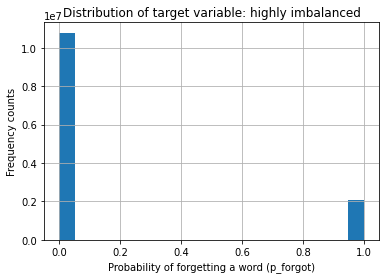

In [ ]:
plt.figure()
plt.xlabel("Probability of forgetting a word (p_forgot)")
plt.ylabel("Frequency counts")
plt.title("Distribution of target variable: highly imbalanced")
datadf['p_forgot_bin'].hist(bins=20)

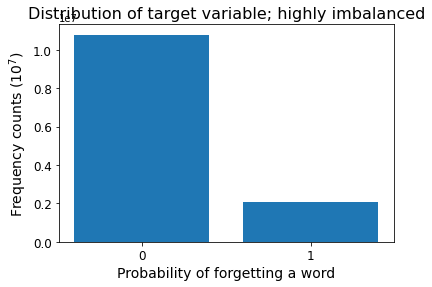

In [ ]:
counts = datadf['p_forgot_bin'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(counts.index,counts)
plt.xticks([0,1],fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Frequency counts ($10^7$)",fontsize=14)
plt.xlabel("Probability of forgetting a word",fontsize=14)
plt.title("Distribution of target variable; highly imbalanced",fontsize=16)
plt.show()

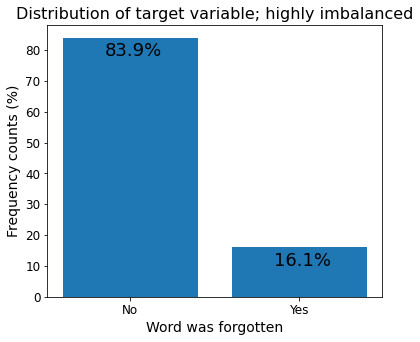

In [ ]:
counts = np.around(datadf['p_forgot_bin'].value_counts(normalize=True)*100,2)
plt.figure(figsize=(6,5))
plt.bar(counts.index,counts)
plt.xticks([0,1],fontsize=12,labels = ['No','Yes'])
plt.yticks(fontsize=12)
plt.ylabel("Frequency counts (%)",fontsize=14)
plt.xlabel("Word was forgotten",fontsize=14)
plt.title("Distribution of target variable; highly imbalanced",fontsize=16)
plt.annotate("83.9%",(0-.15,78),fontsize=18,c='black')
plt.annotate("16.1%",(1-.15,10),fontsize=18,c='black')
plt.show()

Majority of p_Recall is 1. Imbalanced dataset, because we are interested in predicting if a student has forgotten. We can define a new target variable here. p_forgot=1-p_recall

In [ ]:
language_difficulty = datadf.groupby(['ui_language','learning_language'])['p_forgot_bin'].mean().sort_values(ascending=False).apply(lambda x: np.around(x*100,1))

In [ ]:
language_difficulty = pd.DataFrame(language_difficulty)

In [ ]:
language_difficulty.to_csv('languagedifficult.csv')
from google.colab import files
files.download('languagedifficult.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
datadf.loc[datadf['p_forgot_bin']==1,'delta_days']

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


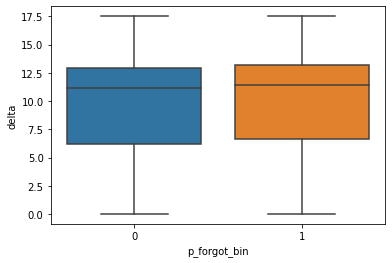

In [ ]:
sns.boxplot(datadf['p_forgot_bin'],np.log(datadf['delta']))

In [ ]:
datadf['history_frac'] = datadf['history_correct']/datadf['history_seen']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


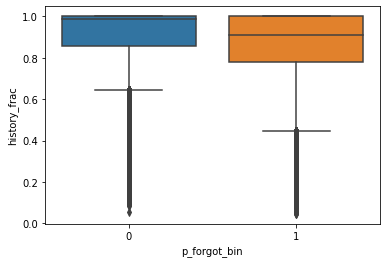

In [ ]:
sns.boxplot(datadf['p_forgot_bin'],datadf['history_frac'])

In [ ]:
datadf['history_seen'].median()

6.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


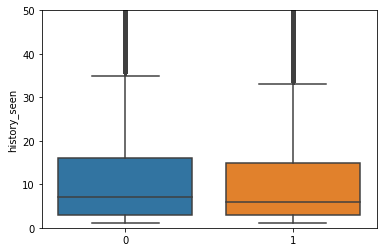

In [ ]:
sns.boxplot(np.where(datadf['p_recall']>0.5,1,0),datadf['history_seen'])
plt.ylim((0,50))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


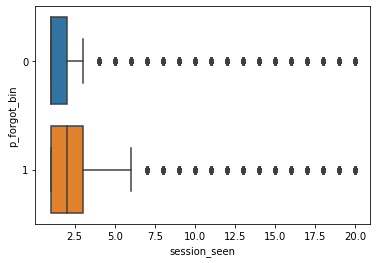

In [ ]:
sns.boxplot(datadf['session_seen'],datadf['p_forgot_bin'],orient='h')

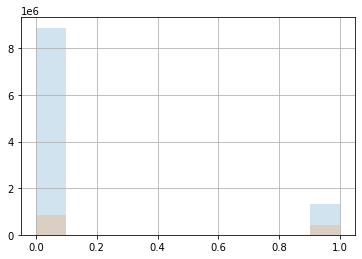

In [ ]:
datadf.loc[datadf['session_seen']<3,'p_forgot_bin'].hist(alpha=0.2)
datadf.loc[datadf['session_seen']>3,'p_forgot_bin'].hist(alpha=0.2)

p_recall is being calculated by the number of questions in the session answered correctly, as is p_forgot. There are two potential issues with this:

1. The first time the student encounters a question, if they answer it wrong, they get immediate feedback on the correct answer. The delta for subsequent questions then cannot accurately be considered the same as the first question. 
2. Distribution of p_recall depends on the number of questions answered. If the student answers 1 question on the word in the session, I have a lower confidence of it not being a co-incidence than if they answered more questions correctly.
 - we could consider the threshold for converting to a binary target variable to depend on the number of questions answered. 
 - we could ignore the single trace records, or model them separately.

The p_recall is stored as a float with 4 decimal sig figs. We probably don't need this level of differentiation, so we can change it to be correct to two decimal digits. (Possibly 1)


p_recall is rounded to two digits, and a distribution is tabulated. This is quite slow. 

In [ ]:
datadf.loc[datadf['delta']<24*60*60,:].shape[0]/datadf.shape[0]*100

52.972438791725

In [ ]:
run_slow = True

if run_slow:
  datadf['p_recall_trunc'] = np.around(datadf['p_recall'],2)
  p_distribution = pd.DataFrame(datadf['p_recall_trunc'].value_counts(normalize=True).sort_index(ascending=False))
  display(p_distribution.head(10))

,p_recall_trunc
1.00,0.838864
0.95,0.000012
0.94,0.000080
0.93,0.000103
0.92,0.000174
0.91,0.000172
0.90,0.000318
0.89,0.000501
0.88,0.000874
0.87,0.000026


Plotted below as histogram:

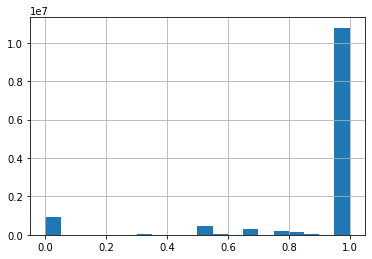

In [ ]:
datadf['p_recall_trunc'].hist(bins=20)

There are pockets between 0.5 to 0.85, but the overwhelming majority of the records show complete recall. We can assume that if a student remembers the word, they will answer the question correctly. We also assume that if they answered correctly, it is not becuase they got lucky with their guess. So all probabilities below one can be grouped as 'forgot', and p_recall = 1 can be 'hasn't forgotten'. We will compute p_forgot_bin (binary variable) as 1, if p_recall < 1.0, and 0 in all other cases. 

In [ ]:
datadf['p_forgot_bin'] = np.where(datadf['p_forgot']==0,0,1)

In [ ]:
datadf['p_forgot_bin'].value_counts(normalize=True)

0    0.838864
1    0.161136
Name: p_forgot_bin, dtype: float64

In [ ]:
datadf['delta_days'] = datadf['delta']/60/60/24

In [ ]:
datadf['delta_days'].head()

0    320.018924
1    320.018924
2    320.018924
3    320.018924
4    320.018924
Name: delta_days, dtype: float64

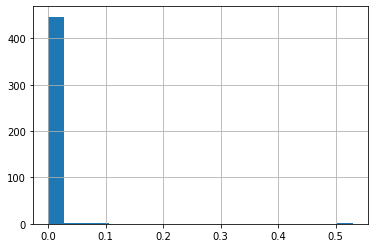

In [ ]:
datadf['delta_days'].astype(int).value_counts(normalize=True).hist(bins=20)

In [ ]:
datadf[datadf['delta_days'].astype(int)<1].shape[0]/datadf.shape[0]*100

52.972438791725

53% of the rows involve deltas from learning sessions less than 24 hours apart.


- we should look into whether the ones and zeros are mainly from single question sessions, and make a call on whether to use them for our predictions. If we use them, is it possible to evaluate models on their predictions on many-question sessions separately from single question sessions?

In [ ]:
datadf[datadf['session_seen']==1].shape[0]/datadf.shape[0]*100

58.93713864996617

59% of the records involve encountering a word only once in a session. 

Imbalanced dataset. will need to look into changing the weight of the classes, or up/down sampling. 

This is a highly imbalanced dataset. 


Let's get the number of student-word pairs that only show up once in the whole dataset.

The series tracelen stores the number of records linked to a unique student-word pairing. The number of student-word pairs with only one record is computed. 

In [ ]:
tracelen = datadf.groupby(['user_id','lexeme_id'])['p_forgot_bin'].count()

In [ ]:
tracelen[tracelen==1].shape[0]/tracelen.shape[0]*100

56.14807760777764

In [ ]:
tracelen[tracelen==1].shape[0]/datadf.shape[0]*100

25.603968687029464

Student word pairings with only one record in the 2 week dataset are 25% of the dataset. The distribution of # of records per student-word pair is below:

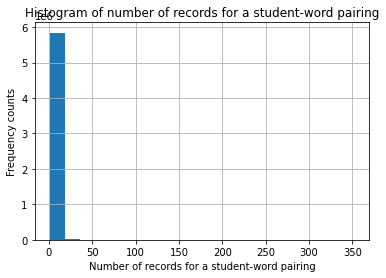

In [ ]:
plt.figure()
tracelen.hist(bins=20)
plt.xlabel("Number of records for a student-word pairing")
plt.ylabel("Frequency counts")
plt.title("Histogram of number of records for a student-word pairing")
plt.show()

Replotting on a log scale. 

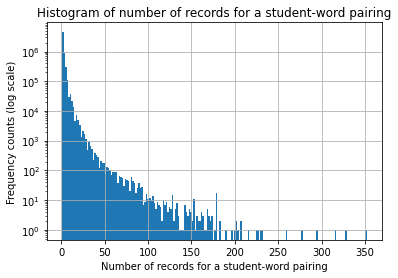

In [ ]:
plt.figure()
tracelen.hist(log=True,bins=200)
plt.xlabel("Number of records for a student-word pairing")
plt.ylabel("Frequency counts (log scale)")
plt.title("Histogram of number of records for a student-word pairing")
plt.show()

Although the majority of the student-word pairs have only one record or few records, there are a sizable # with more than 50 records in the two week span.

Can we cluster students based on profile? Can we use these clusters for predicting if they have forgotten a word or not?

1. Number of records.
2. number of languages learning actively
3. native language
4. learning language
5. average delta
8. std deviation of delta
9. average p_forgot_bin
10. average p_forgot
11. delta after lowest performance session?
12. delta of lowest performance session?
13. delta after highest performance session?
14. delta of highest performance session?
15. average # of sessions logged in per week
16. average words per session. 
17. average length of session

We can try to find learning sessions by clustering by timestamp using DBSCAN. 

splitting will have to take into account time series considerations - so if we are trying to predict, we should split by time, and also 


In [ ]:
datadf['p_recall'] = np.where(datadf['p_recall']==0,0.0001,datadf['p_recall']/(1.0001)) # modified to prevent log 0 errors in math below

In [ ]:
import math
import numpy as np

datadf['logp_recall'] = np.log2(datadf['p_recall'])


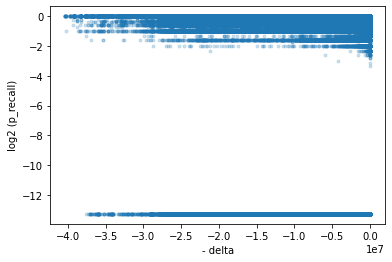

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(-datadf['delta'],datadf['logp_recall'],'.',alpha=0.2)
plt.xlabel("- delta")
plt.ylabel("log2 (p_recall)")

plt.show()

1/h would be the slope if h was constant. but it is not. so it is not linear. there are many h.

In [ ]:
# plotting the calculated h(t) from the experimental p_recall(t) vs # of exposures and deltas
import math
import numpy as np
#datadf['logp_recall_2'] = datadf['p_recall'].apply(lambda x: math.log(x,2))
#datadf['calc_h'] = - datadf['delta']/datadf['logp_recall_2']
trace = datadf.loc[(datadf['user_id']=='u:bcH_')&\
           (datadf['lexeme_string']=='my/my<det><pos><sp>'),:].\
           sort_values(by='Datetime',ascending=True)
trace.head()
# also getting an idea of the sensitivity of p to h.

KeyError: ignored

Get the dimensions of the dataset

In [ ]:
datadf.shape

(12854226, 14)

Check for duplicates

In [ ]:
# check for dupliacates?
datadf.duplicated().sum()

81

In [ ]:
datadf[datadf.duplicated()]

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,logp_recall_2,calc_h
3067848,0.749775,1362334650,6037137,u:fyCE,es,en,86584daef5933b284384453795bbf0ed,hombre/hombre<n><m><sg>,4,3,4,3,-0.415470,1.453085e+07
3067849,0.799760,1362334650,6037137,u:fyCE,es,en,605a1c36da2cf22706eaad95b0b7eeee,niño/niño<n><m><sg>,3,3,5,4,-0.322361,1.872788e+07
3402349,0.499850,1362353111,426085,u:zD_,fr,en,c5059c4d9d73f25a415904bade8a1337,posé/poser<vblex><pp><m><sg><@compound_past>,25,12,2,1,-1.000433,4.259007e+05
3402354,0.000100,1362353111,3906547,u:zD_,fr,en,22ba409694ae64f3768d993f4b81708f,parliez/parler<vblex><pii><p2><pl>,1,1,1,0,-13.287857,2.939938e+05
3402355,0.999700,1362353111,435992,u:zD_,fr,en,c4d97966fdca70e0964004f50ff50d66,entièrement/entièrement<adv>,20,11,1,1,-0.000433,1.007372e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7702861,0.999700,1362683117,82,u:i5X3,en,es,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,5,4,1,1,-0.000433,1.894634e+05
7722347,0.999700,1362684186,331356,u:gMHD,en,es,1849080c74cfc80bb39a5a493e85efe8,see/see<vblex><inf>,17,15,1,1,-0.000433,7.656077e+08
7722348,0.000100,1362684186,330165,u:gMHD,en,es,019e69c0c7349a49fff531b7c5fc263c,have/have<vbhaver><pres><@present_perfect>,73,66,1,0,-13.287857,2.484712e+04
7722349,0.000100,1362684186,77803,u:gMHD,en,es,e09b138d58a98c83f120ffbc898ce818,at/at<pr>,61,54,1,0,-13.287857,5.855196e+03


In [ ]:
# unclear whether duplicated data, or just multiple times encountering the same word in thst session.
#datadf = datadf[~datadf.duplicated()]

only 81 records of duplicated data

In [ ]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854226 entries, 0 to 12854225
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   p_recall           float64
 1   timestamp          int64  
 2   delta              int64  
 3   user_id            object 
 4   learning_language  object 
 5   ui_language        object 
 6   lexeme_id          object 
 7   lexeme_string      object 
 8   history_seen       int64  
 9   history_correct    int64  
 10  session_seen       int64  
 11  session_correct    int64  
 12  logp_recall_2      float64
 13  calc_h             float64
dtypes: float64(3), int64(6), object(5)
memory usage: 1.3+ GB


In [ ]:
datadf.isna().any()

p_recall             False
timestamp            False
delta                False
user_id              False
learning_language    False
ui_language          False
lexeme_id            False
lexeme_string        False
history_seen         False
history_correct      False
session_seen         False
session_correct      False
logp_recall_2        False
calc_h               False
dtype: bool

In [ ]:
datadfcat = datadf.select_dtypes('object')

In [ ]:
datadfcat.columns

Index(['user_id', 'learning_language', 'ui_language', 'lexeme_id',
       'lexeme_string'],
      dtype='object')

In [ ]:
user_id_vals = datadfcat['user_id'].unique()
print(user_id_vals)

['u:FO' 'u:dDwF' 'u:g3WM' ... 'u:f_W4' 'u:i8m1' 'u:h8_Y']


In [ ]:
len(user_id_vals)

115222

there are 115,222 individual language learners in the dataset.

In [ ]:
uilang_vals = datadf['ui_language'].unique()

In [ ]:
print(len(uilang_vals),uilang_vals)

4 ['en' 'pt' 'es' 'it']


The dataset contains students whose first language is English, Portugese, Spanish and Italian.

In [ ]:
lelang_vals = datadf['learning_language'].unique()

In [ ]:
print(lelang_vals)

['de' 'es' 'pt' 'en' 'fr' 'it']


Languages being learned are German, Spanish, Portugese, English, French, and Italian. 

In [ ]:
pd.crosstab(datadf['ui_language'],datadf['learning_language'])

learning_language,de,en,es,fr,it,pt
ui_language,,,,,,
en,1452597,0,3407689,1873734,793935,311480
es,0,3641179,0,0,0,0
it,0,424152,0,0,0,0
pt,0,949460,0,0,0,0


The dataset has Spanish, Italian and Portugese students learning Englush, and English students learning German, Spanish, Italian, Portugese, French, and German. 
No odd values like learning language and native language being the same. We should confirm the meaning of ui_language and learning_language. 

In [ ]:
datadf['lexeme_id'].head(5)

0    76390c1350a8dac31186187e2fe1e178
1    7dfd7086f3671685e2cf1c1da72796d7
2    35a54c25a2cda8127343f6a82e6f6b7d
3    0cf63ffe3dda158bc3dbd55682b355ae
4    84920990d78044db53c1b012f5bf9ab5
Name: lexeme_id, dtype: object

In [ ]:
datadf['lexeme_string']

0           lernt/lernen<vblex><pri><p3><sg>
1              die/die<det><def><f><sg><nom>
2                   mann/mann<n><m><sg><nom>
3                   frau/frau<n><f><sg><nom>
4             das/das<det><def><nt><sg><nom>
                          ...               
12854221               the/the<det><def><sp>
12854222                eat/eat<vblex><pres>
12854223                  bread/bread<n><sg>
12854224            drink/drink<vblex><pres>
12854225                  water/water<n><sg>
Name: lexeme_string, Length: 12854226, dtype: object

In [ ]:
lexid_vals = datadf['lexeme_id'].unique()
print(len(lexid_vals))

19279


In [ ]:
lex_vals = datadf['lexeme_string'].unique()
print(len(lex_vals))

18781


Odd that it doesn't seem to be a one to one mapping between lexeme id and lexeme string. Must be a many to one mapping. 

In [ ]:
lexeme_lang = pd.crosstab(datadf['lexeme_id'],datadf['learning_language'])

In [ ]:
lexeme_lang_bool = lexeme_lang.astype(bool).sum(axis=1)
lexeme_lang_bool[lexeme_lang_bool!=1]

Series([], dtype: int64)

Lexeme id to language is a many to one mapping. How about lexeme string to language?

In [ ]:
lexs_lang = pd.crosstab(datadf['lexeme_string'],datadf['learning_language'])

In [ ]:
lexs_lang_bool = lexs_lang.astype(bool).sum(axis=1)
lexs_lang_bool[lexs_lang_bool!=1].sort_values(ascending=False)

lexeme_string
sentir/sentir<vblex><inf>                   3
carne/carne<n><f><sg>                       3
tu/tu<prn><tn><p2><mf><sg>                  3
<*sf>/sala<n><f><*numb>                     3
principalmente/principalmente<adv>          3
                                           ..
antes/antes<adv>                            2
andar/andar<vblex><inf><@future_phrasal>    2
anda/andar<vblex><pri><p3><sg>              2
amigos/amigo<n><m><pl>                      2
zoo/zoo<n><m><sg>                           2
Length: 462, dtype: int64

The above are the lexeme strings that are in more than one language. For instance, "sentir/\<vblex\>\<inf>\" is in 3 languages. We should see if lexeme strings that English has in common with other languages are answered correctly more often. Let's see which lexeme strings are in English and other languages.

In [ ]:
lexs_lang[(lexs_lang_bool!=1) & (lexs_lang['en']>1)]

learning_language,de,en,es,fr,it,pt
lexeme_string,,,,,,
also/also<adv>,16,1142,0,0,0,0
in/in<pr>,0,14102,0,0,345,0
no/no<adv>,0,13437,37234,0,2744,0
per/per<pr>,0,534,0,0,452,0


There are only 4 examples of lexemes that English shares with other languages. We should see if non-English speakers guess these correctly more often and vice versa.

How many students are learning more than one language at once?

In [ ]:
pd.crosstab(datadf['user_id'],datadf['learning_language']).astype(bool).sum(axis=1).sort_values(ascending=False).head(10)

user_id
u:cEsp    6
u:iv01    5
u:goSi    5
u:b5GM    5
u:hz37    5
u:iCe2    5
u:iRSg    5
u:iOwb    5
u:hnb-    5
u:cxnU    5
dtype: int64

In [ ]:
datadf.loc[datadf['user_id']=='u:cEsp','learning_language'].value_counts().index

Index(['en', 'it', 'pt', 'fr', 'es', 'de'], dtype='object')

There are some users who are learning multiple languages at the same time. 

In [ ]:
datadf['Datetime'] = pd.to_datetime(datadf['timestamp'])

In [ ]:
datadf['timestamp'].describe()

count    1.285423e+07
mean     1.362589e+09
std      2.932082e+05
min      1.362076e+09
25%      1.362343e+09
50%      1.362591e+09
75%      1.362846e+09
max      1.363105e+09
Name: timestamp, dtype: float64

In [ ]:
from datetime import datetime

# current date and time
now = datetime.now()

timestamp = datetime.timestamp(now)
print("timestamp =", timestamp)

timestamp = 1653450834.503986


In [ ]:
dt_object = datetime.fromtimestamp(timestamp)
dt_object

datetime.datetime(2022, 5, 25, 3, 53, 54, 503986)

In [ ]:
datadf['Datetime'] = datadf['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [ ]:
datadf['Datetime'].head()

0   2013-02-28 18:28:01
1   2013-02-28 18:28:01
2   2013-02-28 18:28:01
3   2013-02-28 18:28:01
4   2013-02-28 18:28:01
Name: Datetime, dtype: datetime64[ns]

In [ ]:
datadf['Datetime'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                12854226
unique                 574814
top       2013-03-05 21:09:36
freq                      217
first     2013-02-28 18:28:01
last      2013-03-12 16:14:57
Name: Datetime, dtype: object

In [ ]:
mintimestamp = datadf['timestamp'].min()
maxtimestamp = datadf['timestamp'].max()
print(datetime.fromtimestamp(mintimestamp))
print(datetime.fromtimestamp(maxtimestamp))

2013-02-28 18:28:01
2013-03-12 16:14:57


Data spans from Feb 28, 2013 to Mar 12, 2013. 

In [ ]:
# What is delta??? is it the time since the last session? it has to be. in what unit is it though?
# 10^6 seconds?
datadf['delta_dt'] = datadf['delta'].apply(lambda x:pd.Timedelta(x,unit='s'))


count    1.285423e+07
mean     7.295811e+05
std      2.246499e+06
min      1.000000e+00
25%      5.320000e+02
50%      7.713400e+04
75%      4.425070e+05
max      4.032836e+07
Name: delta, dtype: float64

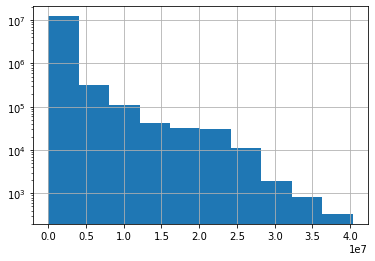

In [ ]:
datadf['delta'].hist(log=True)
datadf['delta'].describe()

Histogram is skewed heavily to left, with most words being encountered almost immediately after the previous time.  

Need to shift p_recall so next one is in previous record. save as next, then calculate the actual h for it. try different delta units

In [ ]:
# using days difference as delta instead
# plotting the calculated h(t) from the experimental p_recall(t) vs # of exposures and deltas
import math
import numpy as np
#datadf['p_recall'] = np.where(datadf['p_recall']==0,0.0001,datadf['p_recall']/(1.0001))
#datadf['logp_recall_2'] = datadf['p_recall'].apply(lambda x: math.log(x,2))
#datadf['calc_h'] = - datadf['delta']/datadf['logp_recall_2']
trace = datadf.loc[(datadf['user_id']=='u:bcH_')&\
           (datadf['lexeme_string']=='my/my<det><pos><sp>'),:].\
           sort_values(by='Datetime',ascending=True)
trace.head()
# also getting an idea of the sensitivity of p to h.

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,Datetime,delta_dt
193836,0.3333,1362092353,61015,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4766,2899,3,1,2013-02-28 22:59:13,0 days 16:56:55
196490,0.9999,1362092494,141,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4769,2900,2,2,2013-02-28 23:01:34,0 days 00:02:21
198265,0.9999,1362092593,100,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4771,2902,1,1,2013-02-28 23:03:13,0 days 00:01:40
202449,0.9999,1362092801,208,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4772,2903,1,1,2013-02-28 23:06:41,0 days 00:03:28
203745,0.9999,1362092866,65,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4773,2904,1,1,2013-02-28 23:07:46,0 days 00:01:05


In [ ]:

trace['p_recall_next'] = trace['p_recall'].shift(-1)
trace['delta_dt_next'] = trace['delta_dt'].shift(-1)
trace.head(15)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,Datetime,delta_dt,logpnext_recall_2,calc_h,p_recall_next,delta_dt_next
193836,0.333300,1362092353,61015,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4766,2899,3,1,2013-02-28 22:59:13,0 days 16:56:55,-0.000144,4.229449e+08,0.999900,0 days 00:02:21
196490,0.999900,1362092494,141,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4769,2900,2,2,2013-02-28 23:01:34,0 days 00:02:21,-0.000144,9.773864e+05,0.999900,0 days 00:01:40
198265,0.999900,1362092593,100,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4771,2902,1,1,2013-02-28 23:03:13,0 days 00:01:40,-0.000144,6.931818e+05,0.999900,0 days 00:03:28
202449,0.999900,1362092801,208,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4772,2903,1,1,2013-02-28 23:06:41,0 days 00:03:28,-0.000144,1.441818e+06,0.999900,0 days 00:01:05
203745,0.999900,1362092866,65,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4773,2904,1,1,2013-02-28 23:07:46,0 days 00:01:05,-2.000144,3.249766e+01,0.249975,0 days 00:01:38
205739,0.249975,1362092964,98,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4774,2905,4,1,2013-02-28 23:09:24,0 days 00:01:38,-1.000144,9.798586e+01,0.499950,0 days 00:01:46
208223,0.499950,1362093070,106,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4778,2906,2,1,2013-02-28 23:11:10,0 days 00:01:46,-13.287712,7.977295e+00,0.000100,0 days 00:02:48
211558,0.000100,1362093238,168,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4780,2907,1,0,2013-02-28 23:13:58,0 days 00:02:48,-13.287712,1.264326e+01,0.000100,0 days 00:01:31
213372,0.000100,1362093328,91,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4781,2907,1,0,2013-02-28 23:15:28,0 days 00:01:31,-1.000144,9.098687e+01,0.499950,0 days 00:01:37
215074,0.499950,1362093425,97,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4782,2907,2,1,2013-02-28 23:17:05,0 days 00:01:37,-13.287712,7.299977e+00,0.000100,0 days 00:01:02


In [ ]:
trace['logpnext_recall_2'] = trace['p_recall_next'].apply(lambda x: math.log(x,2))
trace['calc_h'] = - trace['delta_dt_next']/trace['logpnext_recall_2']


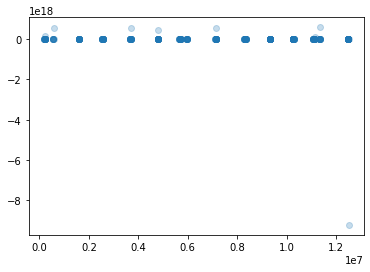

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(trace['calc_h'],'o',alpha=0.25)
plt.show()
plt.figure()

In [ ]:
trace['calc_h'].describe()

count                             351
mean      101 days 09:46:16.410693107
std       769 days 02:28:45.701714088
min         0 days 00:00:00.075257498
25%         0 days 00:00:08.353582379
50%         0 days 00:01:28.322126475
75%         0 days 00:03:33.636224877
max      6847 days 08:05:02.715648896
Name: calc_h, dtype: object

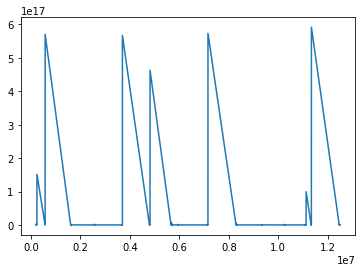

In [ ]:
plt.figure()
trace['calc_h'].plot()
#plt.ylim((0,10000000))


In [ ]:
trace['Date'] = trace['Datetime'].dt.date

In [ ]:
trace1 = trace.groupby('Date').agg(session_seen_ = pd.NamedAgg('session_seen','sum'),session_correct_ = pd.NamedAgg('session_correct','sum'))

In [ ]:
trace1['p_recall'] = trace1['session_correct_']/trace1['session_seen_']
trace1.head()

,session_seen_,session_correct_,p_recall
Date,,,
2013-02-28,51,21,0.411765
2013-03-01,14,3,0.214286
2013-03-02,45,22,0.488889
2013-03-03,63,27,0.428571
2013-03-04,53,22,0.415094


In [ ]:
#trace1 = trace1.reset_index()
trace1['next_date'] = trace1['Date'].shift(-1)
trace1['delta_'] = trace1['next_date'] - trace1['Date']

In [ ]:
trace1.head()

,Date,session_seen_,session_correct_,p_recall,next_date,delta_
0,2013-02-28,51,21,0.411765,2013-03-01,1 days
1,2013-03-01,14,3,0.214286,2013-03-02,1 days
2,2013-03-02,45,22,0.488889,2013-03-03,1 days
3,2013-03-03,63,27,0.428571,2013-03-04,1 days
4,2013-03-04,53,22,0.415094,2013-03-05,1 days


In [ ]:
trace1['p_recall'] = np.where(trace1['p_recall']==0,0.0001,trace1['p_recall']/1.0001)

In [ ]:
trace1['p_recall_next'] = trace1['p_recall'].shift(-1)
trace1['delta_next'] = trace1['delta_'].shift(-1)

In [ ]:
trace1

,Date,session_seen_,session_correct_,p_recall,next_date,delta_,p_recall_next,delta_next,log_pnext,calc_h
0,2013-02-28,51,21,0.411724,2013-03-01,1 days,0.214264,1 days,-2.251539,0 days 10:39:33.756324558
1,2013-03-01,14,3,0.214264,2013-03-02,1 days,0.488840,1 days,-1.029146,0 days 23:19:13.074666588
2,2013-03-02,45,22,0.488840,2013-03-03,1 days,0.428529,1 days,-1.217591,0 days 19:42:39.763276296
3,2013-03-03,63,27,0.428529,2013-03-04,1 days,0.415053,1 days,-1.251539,0 days 19:10:35.016955474
4,2013-03-04,53,22,0.415053,2013-03-05,1 days,0.374963,1 days,-1.434403,0 days 16:43:54.125690217
5,2013-03-05,72,27,0.374963,2013-03-06,1 days,0.350842,1 days,-1.514573,0 days 15:50:45.774710623
6,2013-03-06,57,20,0.350842,2013-03-07,1 days,0.461492,1 days,-1.120294,0 days 21:25:22.596367634
7,2013-03-07,65,30,0.461492,2013-03-08,1 days,0.382315,1 days,-1.395929,0 days 17:11:34.279747215
8,2013-03-08,102,39,0.382315,2013-03-09,1 days,0.387058,1 days,-1.358454,0 days 17:40:01.713307934
9,2013-03-09,62,24,0.387058,2013-03-10,1 days,0.379807,1 days,-1.395929,0 days 17:11:34.279747215


In [ ]:
trace1['log_pnext'] = trace1['p_recall_next'].apply(lambda x: math.log(np.around(x,2),2))

In [ ]:
trace1['calc_h'] = -trace1['delta_next']/trace1['log_pnext']

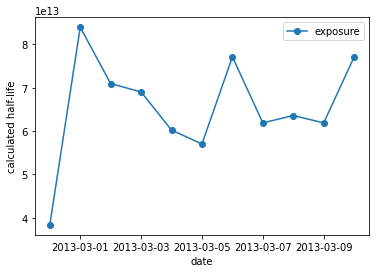

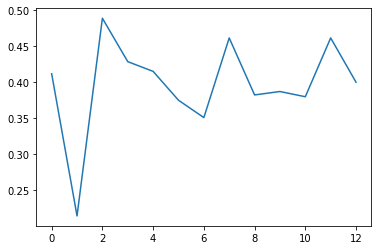

In [ ]:
plt.figure()
plt.plot(trace1['Date'][:-2],trace1['calc_h'][:-2],'o-')
plt.ylabel('calculated half-life')
plt.xlabel('date')
plt.legend(['exposure'])
plt.figure()
plt.plot(trace1['p_recall'])

Half-life is not montonically increasing here, or even non-decreasing. Is the assumption of how half-life increases really justified? Is this maybe because the style of questions changes? maybe transfer learning only happens after some more exposure. 

Try rolling windows after looking at some more curves?

In [ ]:
# how many reasonable long time traces do we have
timetraces = datadf.groupby(['user_id','lexeme_string'])['p_recall'].count()\
.sort_values(ascending=False)
timetraces.head(20)

user_id  lexeme_string                             
u:bcH_   my/my<det><pos><sp>                           352
         to/to<pr>                                     328
         not/not<adv>                                  316
         a/a<det><ind><sg>                             295
         is/be<vbser><pri><p3><sg>                     278
         we/prpers<prn><subj><p1><mf><pl>              260
u:bkiW   <*sf>/difference<n><*numb>                    231
u:bcH_   will/will<vaux><pres><@future>                230
         at/at<pr>                                     227
u:cpBu   is/be<vbser><pri><p3><sg>                     224
         a/a<det><ind><sg>                             216
u:bcH_   they/prpers<prn><subj><p3><mf><pl>            208
u:bkiW   personality/personality<n><sg>                208
u:bcH_   on/on<pr>                                     204
         are/be<vbser><pres>                           202
         have/have<vbhaver><pres><@present_perfect>    202
    

The purposr of plottin the histogram below is to estimate how many time traces are in the dataset with a certain length

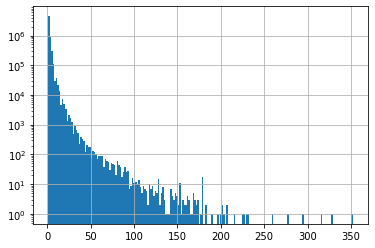

In [ ]:
timetraces.hist(log=True,bins=200)

In [ ]:
timetraces[timetraces>25].count()

9143

There are 9143 traces that are at least 25 records long. 

In [ ]:
timetraces[0]

352

We have a decent number of traceable learning for a number of words. >9000 with atleast 25 differnt sessions. let's trace one. 

In [ ]:
# let us check if it is indeed log normal
import scipy
from scipy import stats
plt.figure()
#scipy.stats.probplot(timetraces, dist='lognorm', fit=True, plot=plt, rvalue=False)
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
datadf.loc[(datadf['user_id']=='u:bcH_')&\
           (datadf['lexeme_string']=='my/my<det><pos><sp>'),:].\
           sort_values(by='Datetime',ascending=True)
  

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,Datetime,delta_dt
193836,0.333333,1362092353,61015,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4766,2899,3,1,2013-02-28 22:59:13,0 days 16:56:55
196490,1.000000,1362092494,141,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4769,2900,2,2,2013-02-28 23:01:34,0 days 00:02:21
198265,1.000000,1362092593,100,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4771,2902,1,1,2013-02-28 23:03:13,0 days 00:01:40
202449,1.000000,1362092801,208,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4772,2903,1,1,2013-02-28 23:06:41,0 days 00:03:28
203745,1.000000,1362092866,65,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4773,2904,1,1,2013-02-28 23:07:46,0 days 00:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500094,0.000000,1363065747,75,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,5577,3225,1,0,2013-03-12 05:22:27,0 days 00:01:15
12501031,0.600000,1363065850,103,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,5578,3225,5,3,2013-03-12 05:24:10,0 days 00:01:43
12502104,0.666667,1363065958,108,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,5583,3228,3,2,2013-03-12 05:25:58,0 days 00:01:48
12503021,0.000000,1363066057,100,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,5586,3230,3,0,2013-03-12 05:27:37,0 days 00:01:40


It looks like columns history seen, and history correct are computed as:
previous history seen + prev record session seen = 

Are there any traces for users encountering a word for the first time ever? (in duolingo)

In [ ]:
datadf.loc[datadf['history_seen']==1]

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,Datetime,delta_dt
18,0.0,1362082194,6032,u:FO,de,en,4fcb6bb8e44d7b618999721071862827,mädchen/mädchen<n><nt><sg><nom>,1,1,1,0,2013-02-28 20:09:54,0 days 01:40:32
19,1.0,1362082194,6032,u:FO,de,en,a6834806c43ea1be9eb3e4fdae6f98db,apfel/apfel<n><m><sg><nom>,1,1,1,1,2013-02-28 20:09:54,0 days 01:40:32
53,1.0,1362082297,6135,u:FO,de,en,dd34978165d17f7e729a2ef331a7600d,er/er<prn><p3><m><sg><nom>,1,1,1,1,2013-02-28 20:11:37,0 days 01:42:15
54,1.0,1362082297,6135,u:FO,de,en,495f763ef6027e020c53431484aa5ede,isst/essen<vblex><pri><p3><sg>,1,1,1,1,2013-02-28 20:11:37,0 days 01:42:15
56,0.0,1362082297,6135,u:FO,de,en,46b112cd07fdcc98db8670a5d71c613d,sie/sie<prn><p3><f><sg><nom>,1,1,1,0,2013-02-28 20:11:37,0 days 01:42:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854163,1.0,1363104894,441159,u:iWSo,it,en,8444bc37386d7ed98cb791fd5b7ea401,<*sf>/sapere<vblex><pri><*pers><*numb>,1,1,1,1,2013-03-12 16:14:54,5 days 02:32:39
12854164,1.0,1363104894,441159,u:iWSo,it,en,de46e1de082bb5af5570e57755a21f9b,<*sf>/trovare<vblex><pri><*pers><*numb>,1,1,1,1,2013-03-12 16:14:54,5 days 02:32:39
12854165,0.0,1363104894,441159,u:iWSo,it,en,b708ce1bd3baae7ed88fee2d81cd7174,<*sf>/vedere<vblex><pri><*pers><*numb>,1,1,1,0,2013-03-12 16:14:54,5 days 02:32:39
12854166,1.0,1363104894,441856,u:iWSo,it,en,105e0792b33a6062b5e7b5e60e8fe36c,<*sf>/volere<vbmod><pri><*pers><*numb>,1,1,1,1,2013-03-12 16:14:54,5 days 02:44:16


The minimum value history seen takes is 1. Not sure what that means. Will ask so-and-so. so there are no traces of the word being encountered for the first time? I guess you can use the delta to back calculate what the very first time was. 

In [ ]:
datadf.loc[(datadf['user_id']=='u:FO') & (datadf['lexeme_string']=='er/er<prn><p3><m><sg><nom>'),:]

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,Datetime,delta_dt
53,1.0,1362082297,6135,u:FO,de,en,dd34978165d17f7e729a2ef331a7600d,er/er<prn><p3><m><sg><nom>,1,1,1,1,2013-02-28 20:11:37,0 days 01:42:15
58,1.0,1362082362,65,u:FO,de,en,dd34978165d17f7e729a2ef331a7600d,er/er<prn><p3><m><sg><nom>,2,2,1,1,2013-02-28 20:12:42,0 days 00:01:05


Can we parse out what words were encountered in a single "session"?
basically group by user_id,and then within 15 minutes of each other?

First let's do it by day, then by hour, then calculate as 'morning','afternoon','evening'/ or should we cluster the timestamps for a day, and do a dbscan? is that overkill?

How does average p_recall change with time since last encountering the word?

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0, 0.5, 'p_recall')

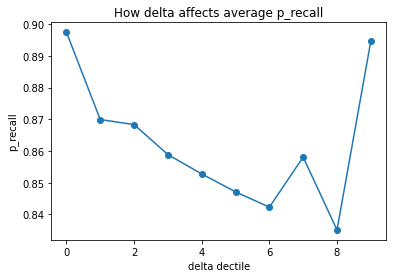

In [ ]:
datadf['cut_delta'] = pd.cut(datadf['delta'],10)
datadf['cut_delta'].head()
plt.figure()
plt.plot(datadf.groupby('cut_delta')['p_recall'].mean(),'o-')
plt.title('How delta affects average p_recall')
plt.xlabel('delta dectile')
plt.ylabel('p_recall')
#sns.barplot(x = 'cut_delta',y = 'p_recall',data = datadf)

How history_seen affects p_recall

(0.0, 2000.0)

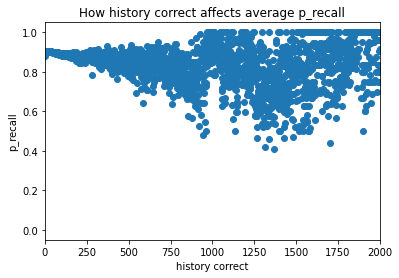

In [ ]:
plt.figure()
plt.plot(datadf.groupby('history_correct')['p_recall'].mean(),'o')
plt.title('How history correct affects average p_recall')
plt.xlabel('history correct')
plt.ylabel('p_recall')
plt.xlim((0,2000))

In [ ]:
datadf[['delta','history_seen','p_recall']].corr()

,delta,history_seen,p_recall
delta,1.000000,-0.030382,-0.030221
history_seen,-0.030382,1.000000,-0.022747
p_recall,-0.030221,-0.022747,1.000000


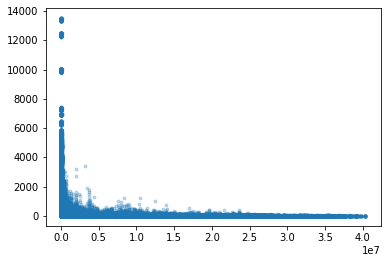

In [ ]:
# seaborn is a bad idea
# sns.pairplot(datadf[['delta','history_seen','p_recall']])
plt.plot(datadf['delta'],datadf['history_seen'],'.',alpha=0.25)

Its possible this slope is less steep than anticipated, because you encounter only words you've learned well at longer deltas (if the SRS is following a Leitner-ish model)

Let's see with what ease students who are native speakers learn a language. 
Let's look at average p_recall for groupings of students from each native to learning language

In [ ]:
# create column for coupling native to learning language
datadf['lang_tup'] = datadf.loc[:,['ui_language','learning_language']].apply(lambda x: (x[0],x[1]),axis=1)
datadf['lang_tup'].head()

0    (en, de)
1    (en, de)
2    (en, de)
3    (en, de)
4    (en, de)
Name: lang_tup, dtype: object

In [ ]:
datadf.groupby('lang_tup')['p_recall'].mean()

lang_tup
(en, de)    0.892786
(en, es)    0.898489
(en, fr)    0.882750
(en, it)    0.908592
(en, pt)    0.905512
(es, en)    0.896289
(it, en)    0.909596
(pt, en)    0.898728
Name: p_recall, dtype: float64

It looks like there is very little difference among the different student groups in their recall (on average). 

Does time of day of learning matter? (There is no timezone information here, is there/ Italian students could be sitting anywhere in the world and leanring English. - So we cannot really figure this one out.) We could make some assumptions, but the calculations would be quite annoying to do. and also assumes timestamps from possibly multiple servers are the exact same. Let's stick with date as our most granular unit. 

Let's get the words per date for each user.

In [ ]:
datadf['Date'] = datadf['Datetime'].dt.date

KeyError: ignored

In [ ]:
session_words = datadf.groupby(['user_id','Date'])['lexeme_string'].unique().reset_index()

In [ ]:
session_words.head()

,user_id,Date,lexeme_string
0,u:--N,2013-03-02,"[dem/das<det><def><nt><sg><dat>, im/in<pr>, ma..."
1,u:--U,2013-03-11,"[großes/groß<adj><pst><nt><sg><acc><mix>, klei..."
2,u:-3I,2013-03-05,"[buvez/boire<vblex><pri><p2><pl>, mangeons/man..."
3,u:-3n,2013-03-07,"[negra/negro<adj><f><sg>, nuevas/nuevo<adj><f>..."
4,u:-4V,2013-03-07,"[kaffee/kaffee<n><m><sg><acc>, fisch/fisch<n><..."


In [ ]:
num_sessions = session_words.groupby('user_id')['Date'].unique()

In [ ]:
num_sessions = pd.DataFrame(num_sessions)
num_sessions['num'] = num_sessions['Date'].apply(lambda x: len(x))

In [ ]:
num_sessions.sort_values(by='num',ascending=False).head()

,Date,num
user_id,,
u:db7q,"[2013-02-28, 2013-03-01, 2013-03-02, 2013-03-0...",13
u:h82e,"[2013-02-28, 2013-03-01, 2013-03-02, 2013-03-0...",13
u:fzXO,"[2013-02-28, 2013-03-01, 2013-03-02, 2013-03-0...",13
u:bcH_,"[2013-02-28, 2013-03-01, 2013-03-02, 2013-03-0...",13
u:fP8x,"[2013-02-28, 2013-03-01, 2013-03-02, 2013-03-0...",13


In [ ]:
#how would we divide train and test data for time series? how would we cross validate?


Let's look at how p_recall changes in real time for some traces.

In [ ]:
trace = datadf.loc[(datadf['user_id']=='u:bcH_')&\
           (datadf['lexeme_string']=='my/my<det><pos><sp>'),:].\
           sort_values(by='Datetime',ascending=True)
trace.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,Datetime,delta_dt,cut_delta,lang_tup,Date
193836,0.333333,1362092353,61015,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4766,2899,3,1,2013-02-28 22:59:13,0 days 16:56:55,"(-40327.361, 4032837.1]","(es, en)",2013-02-28
196490,1.000000,1362092494,141,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4769,2900,2,2,2013-02-28 23:01:34,0 days 00:02:21,"(-40327.361, 4032837.1]","(es, en)",2013-02-28
198265,1.000000,1362092593,100,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4771,2902,1,1,2013-02-28 23:03:13,0 days 00:01:40,"(-40327.361, 4032837.1]","(es, en)",2013-02-28
202449,1.000000,1362092801,208,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4772,2903,1,1,2013-02-28 23:06:41,0 days 00:03:28,"(-40327.361, 4032837.1]","(es, en)",2013-02-28
203745,1.000000,1362092866,65,u:bcH_,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,4773,2904,1,1,2013-02-28 23:07:46,0 days 00:01:05,"(-40327.361, 4032837.1]","(es, en)",2013-02-28


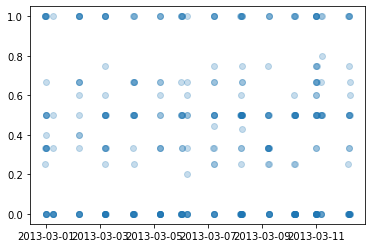

In [ ]:
plt.plot(trace['Datetime'],trace['p_recall'],'o',alpha=0.25)

There are multiple p_values for each date for the same word and same user. we should look at the first p-recall for each day. as well as the average over the day

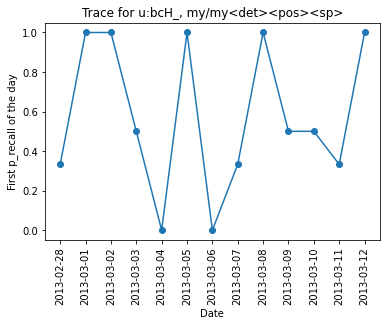

In [ ]:
trace_first = trace.groupby('Date')['p_recall'].first()
plt.plot(trace_first,'o-')
plt.xticks(trace_first.index,rotation = 90)
plt.ylabel('First p_recall of the day')
plt.xlabel('Date')
plt.title("Trace for u:bcH_, my/my<det><pos><sp>")
plt.show()

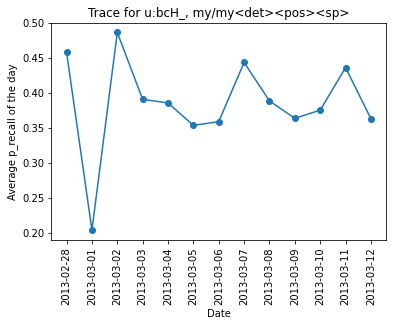

In [ ]:
trace_mean = trace.groupby('Date')['p_recall'].mean()
plt.plot(trace_mean,'o-')
plt.xticks(trace_first.index,rotation = 90)
plt.ylabel('Average p_recall of the day')
plt.xlabel('Date')
plt.title("Trace for u:bcH_, my/my<det><pos><sp>")
plt.show()

Can we look at all the traces for one student grouping for one word? Do we care about exact deltas or do we need only day differences?

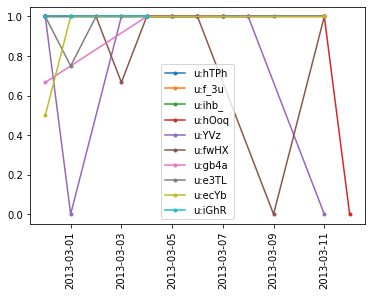

In [ ]:
#lang_tup = ('en','sp')
lexeme_string = "my/my<det><pos><sp>"

user_id_list = datadf.loc[(datadf['lexeme_string']==lexeme_string) , 'user_id'].unique()

plt.figure()

num_students = 1

for user_id in user_id_list:
  trace = datadf.loc[(datadf['user_id']==user_id)&\
           (datadf['lexeme_string']==lexeme_string),:].\
           sort_values(by='Datetime',ascending=True)
  if trace.shape[0]>1:
    trace_first = trace.groupby('Date')['p_recall'].first()
    plt.plot(trace_first,'.-',label = user_id)
    plt.xticks(rotation = 90)
    num_students += 1
  if num_students > 10:
    break
plt.legend()
plt.show()

In [ ]:
traces = pd.DataFrame(traces)
traces = traces.reset_index()
traces.head()

NameError: ignored

In [ ]:
# Sessions previously seen and answered correctly tallies with the previous row's values. 

# with what confidence can we predict the proportion of times a student will recall the 
# correct answer for a given word, and time for a trace that already exists?

# can we predict what the p_recall would be for a time trace that does not exist, given 3 or 4 rows of previous? 
# would these have to be consecutive?

# should we use more than just the previous session as features?

# might overpracticing lead to disengagement? - how to define disengagement?
# might underpracticint lead to overwhelm?

# could we predict based on language learning, ui language, performance on other words, what would the performance on a new word look like?
# at different times? as in would they find that word hard or easy?

# can we predict when student should encounter word again to maximize retention?

# what are the state of the art approaches?

# can we cluster similar students by background? 

# can we see something like - if they have an easy time with this word, they also havw an easy time with this other word?
## can we see if TFIDF and common roots with a word encountered before matters?
# might the word vector matter? 
# might time or day of week matter. would need time zone information
# might priming impact things - as in encountering two words in the same session again has a helping effect?
# encountering late or early in a session?
# what is different about engaged vs not engaged students - when does it drop off

# does performance impact engagement, and return rates?


In [ ]:
# how many of these traces look at the first time a word is encountered?

# should what language you are native at change how the duolingo lesson works?

# can you recommend words for the next session based on current performance?

In [ ]:
# lets set up a simple linear regression model
# with just delta, history_seen, history_correct as a fraction, and try fitting it . let's see what happens. 
X = datadf[['delta','history_seen','history_correct','session_seen']]
X['history_correct'] = X['history_correct']/X['history_seen']
X.head()

In [ ]:
y = datadf['p_recall']

In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import norm #used for plotting
import statsmodels.api as sm

In [ ]:
def colinearity_check(X,threshold_abs_corr= 0.25):
    """
    To check if there is colinearity in parameters before modeling:
    1. Computes correlation matrix for parameters, and displays as a heatmap.
    2. Displays correlation coefficients in order of strength
    3. Plots the strongest positive and negative correlations
    =========================================================
    Requires libraries:
    seasborn as sns
    matplotlib.pyplot as plt
    pandas as pd
    =============================================================
    Arguments: 
    X: pandas dataframe of parameters
    threshold_abs_corr: the minimum absolute value of correlation 
                        coefficient, above which it is considered 
                        a strong correlation, default value: 0.25
    =============================================================
    Returns:
    None
    """
    
    corr_matrix = X.corr()
    scale = X.shape[1]*0.9
    plt.figure(figsize=(scale,scale))
    plt.title("Correlation matrix of parameters")
    sns.heatmap(corr_matrix, vmin=-1, vmax =1, center = 0, mask = np.triu(corr_matrix),cmap = "coolwarm",annot=True)
    plt.show()
    
    # order correlations by strength.
    # get correlation matrix as stacked dataframe
    corr_matrix = corr_matrix.stack().reset_index()
    corr_matrix.columns = ['Param1','Param2','CorrCoef']
    
    # drop correlations of parameters with themselves
    corr_matrix = corr_matrix.drop(corr_matrix[corr_matrix['Param1']==corr_matrix['Param2']].index)

    # drop duplicates (param1,param2) or (param2,param1)
    corr_matrix['coupled'] = corr_matrix[['Param1','Param2']].apply(lambda x: frozenset([x[0],x[1]]),axis=1)
    corr_matrix = corr_matrix.drop_duplicates(subset='coupled')
    corr_matrix = corr_matrix.drop('coupled',axis=1)
    
    # get strongest correlations above a threshold. 
    corr_matrix['AbsCorrCoef'] = abs(corr_matrix['CorrCoef'])
    strong_corr = corr_matrix.loc[corr_matrix['AbsCorrCoef']>=threshold_abs_corr,:]
    #strong_subset = set(corr_matrix['Param1']).union(set(corr_matrix['Param2']))
    totalplot_num = strong_corr.shape[0]
    if totalplot_num%3==0:
        fig_rows = totalplot_num/3
    else:
        fig_rows = int(totalplot_num/3)+1
    
    strong_corr = strong_corr.sort_values(by = 'AbsCorrCoef',ascending=False)
    # Generate plots for strong correlations
    display(HTML("Pair plots"))
    print(f"(|Correlation coefficient| > {threshold_abs_corr})")
    plt.subplots(int(fig_rows),3,figsize=(15,fig_rows*4.5))
    plot_num = 1
    for i,row in strong_corr.iterrows():
        
        plt.subplot(int(fig_rows),3, plot_num)

        plt.title(row['Param2']+' vs '+row['Param1']+', Corr='+str(np.round(row['CorrCoef'],2)))
        plt.xlabel(row['Param1'])
        plt.ylabel(row['Param2'])
        if X[row['Param1']].dtype==int or X[row['Param1']].dtype==bool: # check if column is discrete numeric
            if row['Param1'] in ['Year','Week','Month']: # if time, plot a line plot
                sns.lineplot(x = row['Param1'], y= row['Param2'],data=X)
            else:
                sns.boxplot(x = row['Param1'],y= row['Param2'],data=X) # if discrete numeric, plot a boxplot
        else:
            plt.plot(X[row['Param1']],X[row['Param2']],'o',alpha = 0.05) # if continuous numeric, plot a scatter plot
        plot_num +=1

    plt.tight_layout()
    plt.show()

def run_OLS_model(X,y):
  """
  Runs an ordinary least square model for a given X and y

  Warning: does not check for data compatibility exhaustively
  =====================================================
  Requires libraries:
  pandas as pd
  stats.scipy as stats
  statsmodels.api as sm
  =====================================================
  Arguments:
  X: the predictor variables (not including constant), matrix of numeric variables
  y: target variable, vector of numeric variable
  =====================================================
  Returns:
  myreg1_results: statsmodels OLS model regression results wrapper object (object returned by OLS model fit method)
  """
  assert X.shape[0]==y.shape[0], "Dimensions for X and y do not match, rows should be same"
  # adding constant to X
  X_withc = sm.add_constant(X)

  # 1. Instantiate Model
  myreg1 = sm.OLS(y, X_withc)

  # 2. Fit Model (this returns a seperate object with the parameters)
  myreg1_results = myreg1.fit()

  # Display at the summary
  myreg1_results.summary()
  return myreg1_results    
    

def evaluate_LR_model(mylogreg_results,X):
    """
    Compute the accuracy of a logistic regression model
    Return the accuracy at 0.5,
    Plot accuracy as a function of boundary condition
    Return best accuracy and its corresponding boundary condition
    ==============================================
    Required libraries:
    matplotlib.pyplot as plt
    pandas as pd
    stats.scipy as stats
    statsmodels.api as sm
    ===============================================
    Arguments:
    mylogreg_results: statsmodels logistic regression fit object
    X : the parameter dataset
    ===============================================
    Returns:
    accuracy: Accuracy at boundary condition 0.5
    max_accuracy : max accuracy obtained
    best_bc : boundary condition corresponding to maximum accuracy
    """
    
    # get probabilities (y_predicted)
    probs = mylogreg_results.predict(sm.add_constant(X))
    
    # compute accuracy for a range of boundary conditions, save to dict
    bc_list = np.arange(0.1,1,step=0.1)
    predictions = dict()
    accuracy = dict()
    total_preds = len(probs)
    accuracy = dict()
    for bc in bc_list:
        predictions[bc] = np.where(probs > bc,1,0)
        accuracy[bc] = (y==predictions[bc]).sum()/total_preds*100
    
    # plot line plot of accuracy vs boundary condition
    plt.figure()
    plt.title("Accuracy vs boundary condition")
    plt.plot(accuracy.keys(),accuracy.values())
    plt.show()

    # get max accuracy achieved, and the corresponding boundary condition
    max_accuracy = max(list(accuracy.values()))
    for key in accuracy:
        if accuracy[key] == max_accuracy:
            best_bc = key
            break

    # print results and return
    print(f"Accuracy at boundary_condition=0.5 = {accuracy[0.5]}%")
    print(f"Highest accuracy is at boundary_condition={best_bc} = {max_accuracy}%")
    
    return accuracy[0.5],max_accuracy, best_bc


def OLS_residual_analysis(myreg_results):
  """ 
  Takes in an OLS model and does the following residual analyses for model evaluation:
  1. Shapiro Wilk Test for normality
  2. Histogram of residuals - checking for normality
  3. Q-Q plot of residual distribution
  4. Residuals vs fitted values scatter plot
  ===============================================================================
  Arguments:
  myreg_results: statsmodels OLS model regression results wrapper object (object returned by OLS model fit method)
  ===============================================================================
  Returns:
  none.(plots are displayed from within function)
  ===============================================================================
  Requires libraries:
  import matplotlib.pyplot as plt
  import pandas as pd
  import numpy as np
  import scipy.stats as stats
  """
  print()
  print("============================================")
  print("Residual Analysis of OLS model: ")
  print("Testing the assumption that model residuals are normally disitributed:")
  print("1. Shapiro-Wilk Test for Normality")
  print("Null Hypothesis H0 : The residuals are normally distributed")
  print("Alternate Hypothesis Ha: The residuals are not normally distributed")
  print()
  print("Shapiro-Wilk Test Results:")

  # calculating the shapiro test statisic and its p-value
  SWteststat, SWpvalue = stats.shapiro(myreg_results.resid)
  print(f"Test statistic: {SWteststat}")
  print(f"p-value: {SWpvalue}")
  if SWpvalue < 0.05:
    print("Since the p-value is less than 0.05, there is a statistically significant chance of the residuals not being normally distributed.")
  else:
    print("Since the p-value is more than 0.05, we do not reject the null hypothesis that the residuals are normally distributed.")
  print()
  print("============================================")
  print()
  
  
  # getting histogram of residuals
  print("2. Histogram of residuals is below.")
  plt.subplots(1,3,figsize=(15,5))
  plt.subplot(1,3,1)
  plt.hist(myreg_results.resid)
  plt.xlabel("Binned Residuals")
  plt.ylabel("Frequency counts")
  plt.axvline(myreg_results.resid.mean(),color='black',linewidth = 3)
  plt.axvline(myreg_results.resid.median(),color='red',linewidth = 3)
  plt.title("Distribution of residuals")
  plt.legend(['Mean','Median','Counts'])
  

  # getting skewness results
  skew = myreg_results.resid.skew()
  print(F"Skew of distribution is {skew}")
  if skew>1:
    print("Distribution is skewed slightly to the right")
  elif skew > 3:
    print("Distribution is right skewed")
  elif skew<-1:
    print("Distribution is skewed slightly to the left")
  elif skew <-3:
    print("Distribution is left skewed")
  else:
    print("Distribution is not heavily skewed")

  print()
  print("============================================")
  print()

  # getting Q-Q plot test for normality of residuals
  print("3. Q-Q plot is below")
  plt.subplot(1,3,2)
  #plt.figure()
  plt.title("Q-Q plot of residuals")
  stats.probplot(myreg_results.resid,dist="norm", plot = plt)
  plt.legend(['Residuals','Perfect normal trend line'])
  #plt.show()
  print()
  print("============================================")
  print()

  # getting scatter plot of model residual variance with fitted values 
  print("4. Scatter plot of residuals vs model fitted values is below.")
  plt.subplot(1,3,3)
  plt.plot(myreg_results.fittedvalues,myreg_results.resid,'o',alpha=0.25)
  plt.title("Model residuals vs model fitted values")
  plt.xlabel("Model fitted values (y_predicted)")
  plt.ylabel("Model residuals (y_real-y_predicted)")
  
  plt.tight_layout()
  plt.show()


def one_way_anova_summary(cat_v, num_v, df, exclude = []):
  """
  Gives a summary of one-way ANOVA test results for a categorical and numerical variable in a pandas dataframe,
  including hypotheses, values, and a boxplot. 
  ===========================================
  Requires libraries: 

  matplotlib.pyplot as plt
  seaborn as sns
  stats from scipy
  pandas as pd
  ===========================================
  Arguments:

  cat_v: categorical variable name in dataframe, string type
  num_v: numerical variable name in dataframe, string type
  df: dataframe of interest
  exclude : categorical values to exclude, list type, default is empty list
  ===========================================
  Returns:
  statval: test statistic value for one-way ANOVA test
  pval: p-value for one-way ANOVA test with categorical and numerical variable in dataframe
  pltobj : matplotlib plot object showing a boxplot of the groups
  ============================================
  """
  assert type(cat_v)==str, "Categorical variable name has to be a string"
  assert cat_v in df.columns, "Categorical variable not found in dataframe"
  assert type(num_v)==str, "Numerical variable name has to be a string"
  assert num_v in df.columns, "Numerical variable not found in dataframe"
  assert type(exclude)==list, "Exclude argument has to be a list"
  
  catv_anova = dict()
  catv_vals = df[cat_v].unique()


  for val in catv_vals:
    if val not in exclude:
      catv_anova[val] = df.loc[df[cat_v]==val,num_v]
  
  catv_args = tuple([item[1] for item in catv_anova.items()])

  statval,pval = stats.f_oneway(*catv_args)

  print(f"{cat_v} & {num_v} one-way ANOVA Test:")
  print("="*30)
  print()
  print("Groups tested:")
  print("="*30)
  print(list(catv_anova.keys()))
  print()
  print(f"Null hypothesis H0: The mean value of {num_v} is the same across the groups in {cat_v}")
  print(f"Alternate hypothesis Ha: The mean value of {num_v} is different for at least one group in {cat_v}")
  print("="*30)
  print()
  print(f"{cat_v} & {num_v} one-way ANOVA Results:")
  print(f"test_statistic = {statval}, p-value = {pval}")
  print()

  if pval<0.05:
    print(f"Based on the p-value of {pval}, we can reject the null hypothesis that the mean {num_v} is the same for all groups.")
    print(f"At least one group in {cat_v} has a different mean value of {num_v}")
  else:
    print(f"Based on the p-value of {pval}, we cannot reject the null hypothesis that the mean {num_v} is the same for all groups.")

  
  pltobj = sns.boxplot(x=num_v, y=cat_v, data=df.loc[~df[cat_v].isin(exclude)])
  try:
    pltobj.title(num_v+" by "+cat_v)
  except:
    pltobj.set_title(num_v+" by "+cat_v) 

  
  return statval,pval,pltobj


def interpret_OLS_results(myreg1_results):
  """ 
  Interprets the results of an ordinary least squares model:
  1. points out the parameters with a p-value > 0.05 
  2. displays statistically significant coefficients in descending order in table and bar chart
  =========================================================
  Requires libraries:
  matplotlib.pyplot as plt
  pandas as pd
  scipy.stats as stats
  =========================================================
  Arguments:
  myreg1_results: statsmodels OLS model regression results wrapper object (object returned by OLS model fit method)
  =========================================================
  Returns:
  None (plots displayed from within function)
  """
  
  # get coefficients and pvalues into dataframe
  modeldf = pd.DataFrame(data = {'coefficients':myreg1_results.params,'pvalues':myreg1_results.pvalues})
  modeldf = modeldf.reset_index()

  # get coefficients with p-values >0.05 and display
  highp = modeldf[modeldf['pvalues']>=0.0500]
  if highp.shape[0]>0:
    print()
    print("Consider removing these predictors with pvalues > 0.05. We cannot reject the null hypothesis that the population coefficient values are zero.")
    display(highp.loc[:,['index','pvalues']])
  else:
    print("No coefficients with pvalues > 0.05")

  # display the coefficients table in descending order  
  print("\n")
  print("The below predictors had statistically significant coefficients. We can reject the null hypothesis that the population coefficients of these parameters are zero.")
  print("We can accept that the population coefficient values are non-zero")
  display(modeldf.loc[modeldf['pvalues']<0.0500,['index','coefficients','pvalues']].sort_values(by = 'coefficients',ascending=False))

  # plot bar chart showing scale of coefficients for easy interpreting
  plt.figure()
  #plt.figure(figsize = (7,min(int(modeldf.shape[0]*0.25),3)))
  sns.barplot(x = 'coefficients',y='index',data=modeldf.sort_values(by='coefficients',ascending=False), color='blue')
  plt.title("Model parameter coefficients")
  plt.xlabel('Coefficients')
  plt.ylabel('Parameters')
  plt.show()

def run_LR_model(X,y):
    """ 
    Run logistic regression model from statsmodels
    
    Warning: does not check for data compatibility exhaustively
    =====================================================
    Requires libraries:
    pandas as pd
    stats.scipy as stats
    statsmodels.api as sm
    =====================================================
    Arguments:
    X: the predictor variables (not including constant), matrix of numeric variables
    y: target variable, vector of numeric variable
    =====================================================
    Returns:
    logreg_results: statsmodels logit model regression results wrapper object (object returned by logit model fit method)
    """
    # 0. add constant
    X_withc = sm.add_constant(X)
    # 1. Instantiate model
    logreg= sm.Logit(y,X_withc)
    # 2. Fit model
    logreg_results = logreg.fit()
    # Look at summary
    logreg_results.summary()
    
    return logreg_results




  

In [ ]:
import scipy.stats as stats
from scipy.stats import norm 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
modeldict = dict()
modeldict['M0'] = run_OLS_model(X,y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
modeldict['M0'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               p_recall   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.1216
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.886
Time:                        05:48:52   Log-Likelihood:                -17.073
No. Observations:                  31   AIC:                             40.15
Df Residuals:                      28   BIC:                             44.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7351      0.704      1.044      0.306      -0.708       2.178
history_p     -0.0528      0.784     -0.067      0.947      -1.659       1.554
inv_delta     -5.4030     10.958     -0.493      0.626     -27.850      17.044
==============================================================================
Omnibus:                        7.998   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                4.917
Skew:                          -0.800   Prob(JB):                       0.0856
Kurtosis:                       1.884   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Consider removing these predictors with pvalues > 0.05. We cannot reject the null hypothesis that the population coefficient values are zero.


,index,pvalues
0,const,0.305529
1,history_p,0.946763
2,inv_delta,0.625815




The below predictors had statistically significant coefficients. We can reject the null hypothesis that the population coefficients of these parameters are zero.
We can accept that the population coefficient values are non-zero


,index,coefficients,pvalues


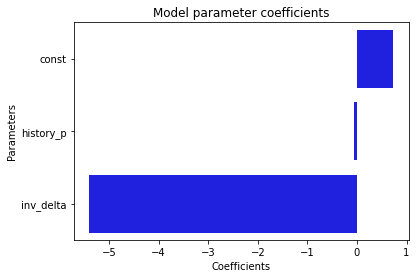

In [ ]:
interpret_OLS_results(modeldict['M0'])

In [ ]:
plt.plot(X['session_seen'],y,'.',alpha=0.25)

Yikes. What about separating out for each user?

In [ ]:
usersp = datadf.loc[datadf['user_id']=='u:FO']
usersp['history_p'] = usersp['history_correct']/usersp['history_seen']
usersp['inv_delta'] = 1/usersp['delta']
usersp['p_delta'] = usersp['history_p']*usersp['inv_delta']
X = usersp[['p_delta']]
y = usersp['p_recall']
print(usersp.shape[0])
run_OLS_model(X,y).summary()

31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               p_recall   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.2043
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.655
Time:                        06:09:07   Log-Likelihood:                -17.099
No. Observations:                  31   AIC:                             38.20
Df Residuals:                      29   BIC:                             41.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6867      0.087      7.865      0.000       0.508       0.865
p_delta       -5.7759     12.779     -0.452      0.655     -31.913      20.361
==============================================================================
Omnibus:                        8.044   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                4.910
Skew:                          -0.798   Prob(JB):                       0.0859
Kurtosis:                       1.879   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All student traces for one particular word, looking at history correct, delta, history seen to predict p_recall. 

In [ ]:
wordsp = datadf.loc[datadf['lexeme_string']=='no/no<adv>']
X = wordsp[['history_seen','delta','history_correct']]
X['history_correct'] = X['history_correct']/X['history_seen']
y = wordsp['p_recall']
print(wordsp.shape[0])
run_OLS_model(X,y).summary()

history_correct/history_seen & 1/delta as the predictors?

Get columns of previous session's p_recall for each trace. 

In [ ]:
trace.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,Datetime,delta_dt,cut_delta,lang_tup,Date
2436,1.0,1362082652,319,u:iGhR,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,8,8,1,1,2013-02-28 20:17:32,0 days 00:05:19,"(-40327.361, 4032837.1]","(es, en)",2013-02-28
11937,1.0,1362083170,518,u:iGhR,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,9,9,1,1,2013-02-28 20:26:10,0 days 00:08:38,"(-40327.361, 4032837.1]","(es, en)",2013-02-28
862817,1.0,1362152282,69112,u:iGhR,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,10,10,1,1,2013-03-01 15:38:02,0 days 19:11:52,"(-40327.361, 4032837.1]","(es, en)",2013-03-01
4032636,1.0,1362414439,262157,u:iGhR,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,11,11,2,2,2013-03-04 16:27:19,3 days 00:49:17,"(-40327.361, 4032837.1]","(es, en)",2013-03-04


In [ ]:
# previous session p_recalls?
trace


,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,Datetime,delta_dt,cut_delta,lang_tup,Date
2436,1.0,1362082652,319,u:iGhR,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,8,8,1,1,2013-02-28 20:17:32,0 days 00:05:19,"(-40327.361, 4032837.1]","(es, en)",2013-02-28
11937,1.0,1362083170,518,u:iGhR,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,9,9,1,1,2013-02-28 20:26:10,0 days 00:08:38,"(-40327.361, 4032837.1]","(es, en)",2013-02-28
862817,1.0,1362152282,69112,u:iGhR,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,10,10,1,1,2013-03-01 15:38:02,0 days 19:11:52,"(-40327.361, 4032837.1]","(es, en)",2013-03-01
4032636,1.0,1362414439,262157,u:iGhR,en,es,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,11,11,2,2,2013-03-04 16:27:19,3 days 00:49:17,"(-40327.361, 4032837.1]","(es, en)",2013-03-04


In [ ]:
datadf['delta'].hist()

NameError: ignored